# Veamos como anda el clustering

In [1]:
#Primero leemos los datos
dat <- read.table('clean_cat.dat', header = TRUE)
summary(dat)

       ra             dec                               Id            J        
 Min.   :176.1   Min.   :-64.66   VVV-J114419.03-603025.9:  1   Min.   :13.63  
 1st Qu.:178.2   1st Qu.:-64.30   VVV-J114428.39-603158.4:  1   1st Qu.:15.86  
 Median :205.1   Median :-63.90   VVV-J114431.78-601626.8:  1   Median :16.55  
 Mean   :196.1   Mean   :-62.78   VVV-J114433.70-602742.8:  1   Mean   :16.36  
 3rd Qu.:206.9   3rd Qu.:-60.51   VVV-J114450.83-603356.9:  1   3rd Qu.:17.01  
 Max.   :207.7   Max.   :-59.72   VVV-J114453.09-601805.8:  1   Max.   :18.02  
                                  (Other)                :566                  
       H               Ks              J2              H2       
 Min.   :13.22   Min.   :13.18   Min.   :13.81   Min.   :13.29  
 1st Qu.:15.40   1st Qu.:15.23   1st Qu.:15.94   1st Qu.:15.42  
 Median :16.07   Median :15.86   Median :16.55   Median :16.06  
 Mean   :15.86   Mean   :15.63   Mean   :16.39   Mean   :15.84  
 3rd Qu.:16.50   3rd Qu.:16.23   3r

In [2]:
#Guardamos los datos q no vamos a usar para claisificar y los sacamos de la tabla
names <- dat$Id
visual <- dat$visual
ra <- dat$ra
dec <- dat$dec

dat <- dat[,-c(1,2,3,14)]

In [10]:
#Hagamos un clustering!

library('mclust') #Cargamos la libreria

mc <- Mclust(dat, G = 1:2) #Probamos con una mixtura de gaussianas con 2 componentes como maximo

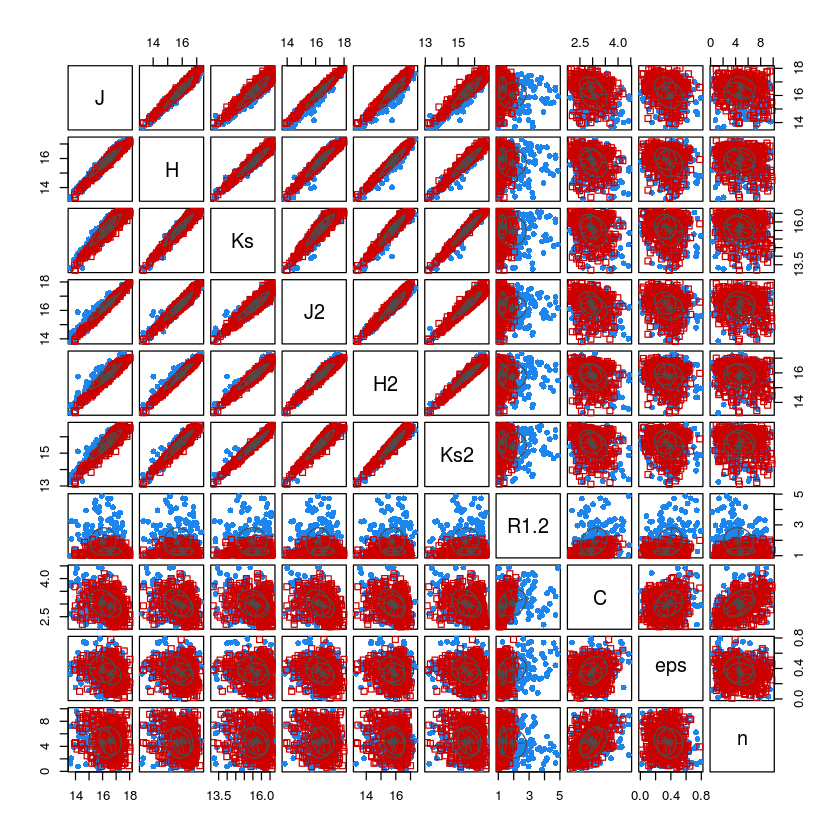

In [11]:
#Hagamos un par de graficos para ver como quedo
plot(mc,what='classification')

In [12]:
#Veamos si alguna de los clusters que encontro el mclust se corresponde con las confirmadas visualmente o las no 
#  confirmadas visualmente.

class <- mc$classification

dat_aux <- data.frame(dat, visual, class)

dat1 <- subset(dat_aux, dat_aux$class == 1)
dat2 <- subset(dat_aux, dat_aux$class == 2)

print('Cluster 1')
table(dat1$visual)
print('Cluster 2')
table(dat2$visual)

[1] "Cluster 1"



False  True 
  184    23 

[1] "Cluster 2"



False  True 
  298    67 

In [15]:
#Probemos ahora con un par mas de componentes

mc <- Mclust(dat, G = 1:5) #Probamos con una mixtura de gaussianas con 5 componentes como maximo
mc$G

[1] 5

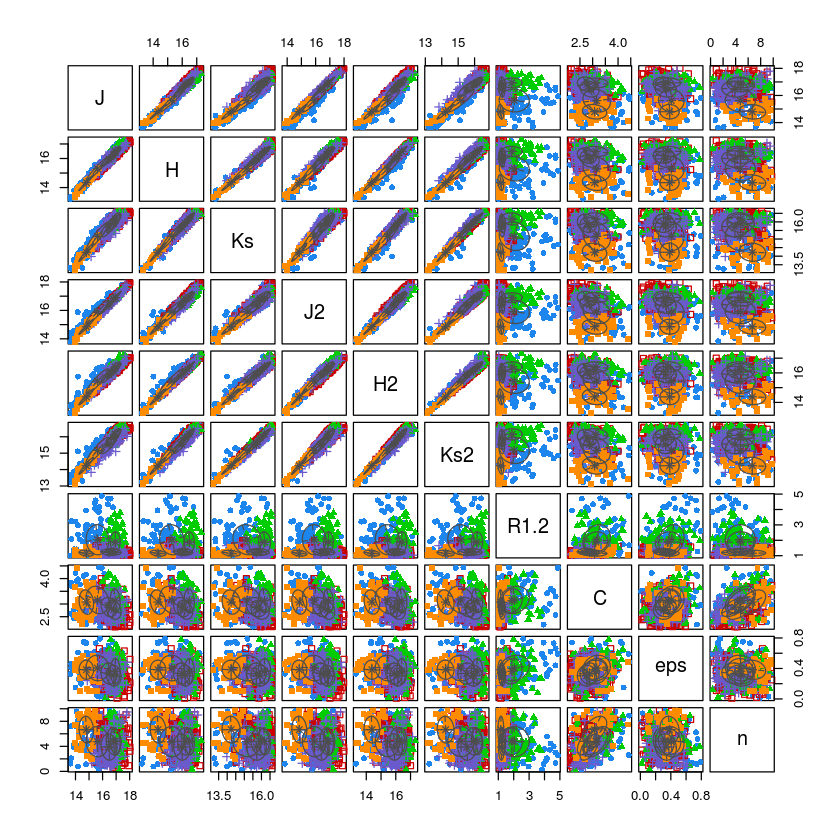

In [14]:
#Hagamos un par de graficos para ver como quedo
plot(mc,what='classification')

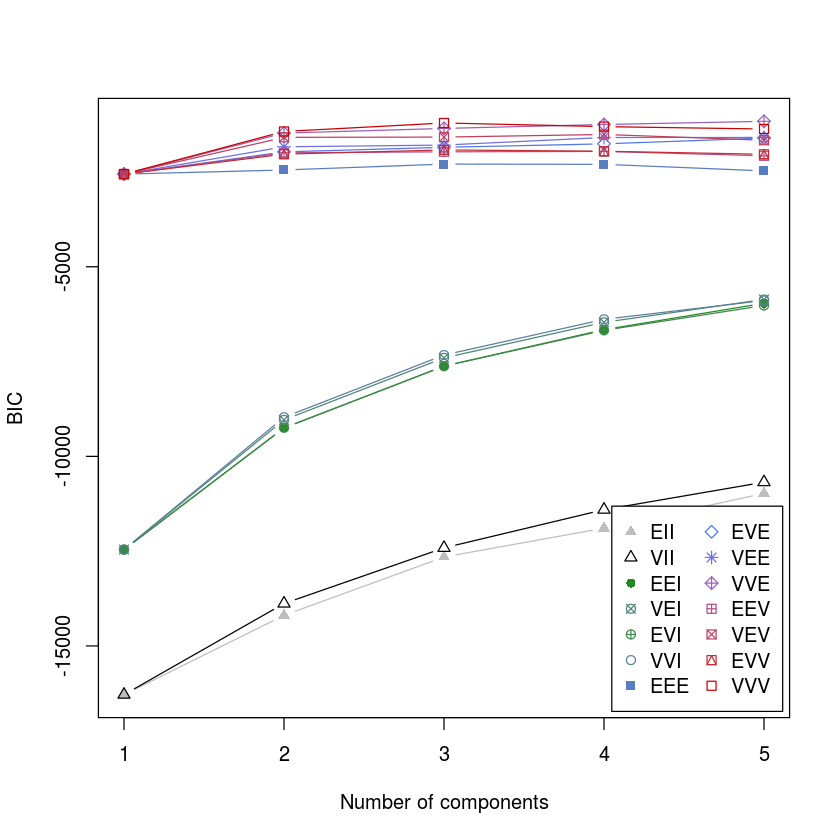

In [16]:
# Grafico del criterio de informacion bayesiano para decidir con que modelo quedarse
plot(mc,what='BIC')

### Conclusiones: 

Si bien el primer algoritmo de clustering encuentra 2 grupos diferentes, ninguno de estos separa las que no fueron confirmadas visualmente de las que si, lo que quiere decir que estas 2 clases son muy similares! 

Cuando le permito probar hasta 5 componentes, encuentra 5 grupos, pero de vuelta ninguno de estos separa las que no fueron confirmadas visualmente de las que si.
Por otro lado en el grafico de BIC se ve que la performance de los modelos no cambia mucho al aumentarle el numero de componentes, lo que significa que es medio ruidoso, que no hay una clara distinción entre estas 5 componentes y que probablemente no haya una distinción física real entre estos clusters.